In [2]:
import numpy as np

In [15]:
M = 50 # num agents
T = 20 # timesteps
R = 0.2 # confidence bound
min_age = 16
max_age = 81
op_drift = 0.01

youth_min_op = 0
youth_max_op = 0.4

In [16]:
x = np.random.rand(M) # init all agents to [0,1]
age_of_x = np.random.randint(min_age,max_age, size=M) 

In [17]:
def get_A(x):
    X = np.array([x]*M)
    mask = abs(X - X.T) < R
    A = np.zeros(M)
    for i in range(M):
        A[i] = np.mean(x[mask[i]])
    return(A)

In [18]:
X = np.zeros((T,M))
X_age = np.zeros((T,M))
X[0,:] = x
X_age[0,:] = age_of_x
for t in range(T-1):
    deaths = X_age[t,:] > max_age
    num_deaths = sum(deaths)
    X_age[t, deaths] = min_age
    if(num_deaths > 0):
        print(num_deaths)
    X[t,:][deaths] = (youth_max_op - youth_min_op) * np.random.random(num_deaths) + youth_min_op  # resurrections
    
    X[t+1,:] = np.minimum(get_A(X[t,:]) + op_drift, 1.0)
    X_age[t+1,:] = X_age[t,:] + 1
X

1
1
1
1
2
1
3
1
1
1


array([[0.30898383, 0.97376969, 0.04141641, 0.32349933, 0.30320699,
        0.18228897, 0.61573643, 0.41366259, 0.19393624, 0.99772346,
        0.29667274, 0.39001091, 0.47244444, 0.52422434, 0.63537579,
        0.80105249, 0.69302412, 0.9604502 , 0.40196063, 0.96183783,
        0.72508012, 0.84299859, 0.82418984, 0.94609503, 0.00465563,
        0.51202105, 0.98623389, 0.61835625, 0.46325692, 0.77447199,
        0.36619961, 0.02464811, 0.04113326, 0.94419767, 0.35867487,
        0.04207961, 0.28200548, 0.77113069, 0.68160226, 0.38955497,
        0.31397886, 0.2264193 , 0.72016419, 0.3025576 , 0.44485866,
        0.33489059, 0.59164626, 0.05914553, 0.19691813, 0.78174815],
       [0.34171341, 0.90956407, 0.11126412, 0.34990921, 0.34171341,
        0.22016556, 0.64683495, 0.39193952, 0.23649441, 0.93385487,
        0.34171341, 0.36545173, 0.43016431, 0.5167192 , 0.65724356,
        0.82276193, 0.70455141, 0.89968458, 0.39193952, 0.89968458,
        0.72975551, 0.85622178, 0.84450811, 0.8

In [19]:
X_age

array([[28., 38., 58., 74., 28., 43., 73., 23., 55., 74., 20., 19., 69.,
        16., 46., 33., 36., 23., 58., 18., 50., 60., 38., 53., 65., 37.,
        20., 79., 77., 22., 25., 25., 25., 69., 68., 76., 21., 52., 75.,
        49., 46., 25., 33., 69., 37., 19., 67., 63., 34., 59.],
       [29., 39., 59., 75., 29., 44., 74., 24., 56., 75., 21., 20., 70.,
        17., 47., 34., 37., 24., 59., 19., 51., 61., 39., 54., 66., 38.,
        21., 80., 78., 23., 26., 26., 26., 70., 69., 77., 22., 53., 76.,
        50., 47., 26., 34., 70., 38., 20., 68., 64., 35., 60.],
       [30., 40., 60., 76., 30., 45., 75., 25., 57., 76., 22., 21., 71.,
        18., 48., 35., 38., 25., 60., 20., 52., 62., 40., 55., 67., 39.,
        22., 81., 79., 24., 27., 27., 27., 71., 70., 78., 23., 54., 77.,
        51., 48., 27., 35., 71., 39., 21., 69., 65., 36., 61.],
       [31., 41., 61., 77., 31., 46., 76., 26., 58., 77., 23., 22., 72.,
        19., 49., 36., 39., 26., 61., 21., 53., 63., 41., 56., 68., 40.,
     

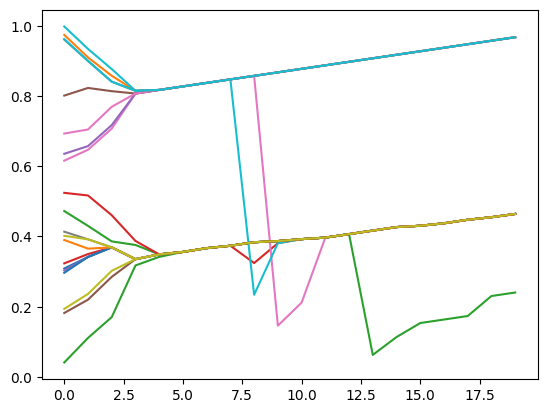

In [20]:
#plotting
import matplotlib.pyplot as plt

for i in range(T):
    plt.plot(X[:,i])
plt.show()